**Movie budget and financial performance analysis**

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [6]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Step1**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [8]:
#shape of data:
data.shape

(5391, 6)

In [9]:
data.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
5,4250,12/30/1925,Ben-Hur,"$3,900,000","$9,000,000","$9,000,000"
6,4630,12/8/1927,Wings,"$2,000,000",$0,$0
7,5141,1/2/1929,The Broadway Melody,"$379,000","$4,358,000","$2,800,000"
8,4240,1/1/1930,Hell's Angels,"$4,000,000",$0,$0
9,5043,12/31/1931,Mata Hari,"$558,000","$900,000","$900,000"


In [11]:
#are there nan values:

data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [12]:
##duplicate rows:

data.duplicated().any()

False

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**step2**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [16]:
import numpy as np
for i in range(3,6):
    data.iloc[:,i] = data.iloc[:,i].astype(str).str.replace('$','')
    data.iloc[:,i] = data.iloc[:,i].str.replace(',','')
    #data.iloc[:,i] = pd.to_numeric(data.iloc[:,i])
    
data['USD_Production_Budget'] =  data['USD_Production_Budget'].astype(np.int64)
data['USD_Worldwide_Gross'] =  data.iloc[:,4].astype(np.int64)
data['USD_Domestic_Gross'] =  data.iloc[:,5].astype(np.int64)

data['Release_Date']=data.iloc[:,1].astype('datetime64[ns]')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


**step3**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [19]:
data['Release_date']=pd.to_datetime(data.iloc[:,1])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
 6   Release_date           5391 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 294.9+ KB



### Descriptive Statistics

**step4**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [22]:
#Average production budget of films in data set:
data['USD_Production_Budget'].mean()

31113737.57837136

In [23]:
# average worldwide gross revenue of films:

data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [25]:
data.iloc[:,4].min()

0

In [26]:
data.iloc[:,5].min()

0

In [27]:
#bottom 25% of films:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00",5391
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44",2003-09-19 15:02:02.203672704
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00,1915-08-02 00:00:00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50",1999-12-02 12:00:00
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00",2006-06-23 00:00:00
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00",2011-11-23 00:00:00
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00",2020-12-31 00:00:00
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27",NaN


In [30]:
#Film with lowest budget:

In [31]:
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,2005-05-08


%%HTML
<img src="movie_poster.jpg">

In [27]:
#Film with highest budget:

In [29]:
data[data.USD_Production_Budget ==  425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2009-12-18


%%HTML
<img src='Avatar.jpg'>

In [ ]:
#Film which grossed 0 in budget:

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [49]:
data[data.USD_Domestic_Gross == 0].head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
1,5140,1916-05-09,Intolerance,385907,0,0,1916-05-09
6,4630,1927-12-08,Wings,2000000,0,0,1927-12-08
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930-01-01
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0,1936-10-20
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0,1941-10-28
50,4419,1951-07-28,Alice in Wonderland,3000000,0,0,1951-07-28
66,4705,1955-12-31,The King’s Thief,1577000,0,0,1955-12-31
71,4310,1956-02-16,Carousel,3380000,3220,0,1956-02-16
75,4455,1956-12-01,Diane,2660000,0,0,1956-12-01
78,5152,1957-04-13,12 Angry Men,340000,0,0,1957-04-13


<img src='12_angry_men.jpg'>

In [ ]:
#Films that had 0 domestic gross but largest profuction budget:

In [47]:
data[data.USD_Domestic_Gross == 0].nlargest(3,'USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
5388,96,2020-12-31,Singularity,175000000,0,0,2020-12-31
5387,126,2018-12-18,Aquaman,160000000,0,0,2018-12-18
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,2018-09-03


In [50]:
#Films that had 0 international gross:

In [51]:
data[data.USD_Worldwide_Gross == 0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
1,5140,1916-05-09,Intolerance,385907,0,0,1916-05-09
6,4630,1927-12-08,Wings,2000000,0,0,1927-12-08
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930-01-01
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0,1936-10-20
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0,1941-10-28
...,...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0,2018-10-08
5387,126,2018-12-18,Aquaman,160000000,0,0,2018-12-18
5388,96,2020-12-31,Singularity,175000000,0,0,2020-12-31
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,2020-12-31


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [44]:
data[data.apply(lambda x: (x.USD_Domestic_Gross == 0) and (x.USD_Worldwide_Gross != 0), axis=1)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
71,4310,1956-02-16,Carousel,3380000,3220,0,1956-02-16
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,2001-02-11
1744,3695,2001-12-31,The Hole,7500000,10834406,0,2001-12-31
2155,4236,2003-12-31,Nothing,4000000,63180,0,2003-12-31
2203,2513,2004-03-31,The Touch,20000000,5918742,0,2004-03-31
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,2017-04-14
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,2017-05-05
5360,4832,2017-07-03,Departure,1100000,27561,0,2017-07-03
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,2017-08-25


In [45]:
data.query( 'USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
71,4310,1956-02-16,Carousel,3380000,3220,0,1956-02-16
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,2001-02-11
1744,3695,2001-12-31,The Hole,7500000,10834406,0,2001-12-31
2155,4236,2003-12-31,Nothing,4000000,63180,0,2003-12-31
2203,2513,2004-03-31,The Touch,20000000,5918742,0,2004-03-31
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,2017-04-14
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,2017-05-05
5360,4832,2017-07-03,Departure,1100000,27561,0,2017-07-03
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,2017-08-25


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [47]:
pd.to_datetime('May 1 2018', dayfirst=True)

Timestamp('2018-05-01 00:00:00')

In [48]:
new=data[data.Release_Date > pd.to_datetime('May 1 2018')]

In [49]:
data_clean = data.drop(new.index)

In [50]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915-08-02
1,5140,1916-05-09,Intolerance,385907,0,0,1916-05-09
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916-12-24
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920-09-17
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1925-01-01
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2017-10-02
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2017-10-03
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2017-12-05
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2017-12-05


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [52]:
(len(data_clean.query('USD_Production_Budget > USD_Worldwide_Gross'))/len(data_clean))*100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

In [53]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



**Budget vs Worldwide gross**

Text(0, 0.5, '(USD_Worldwide_Gross) Revenue in $ billions')

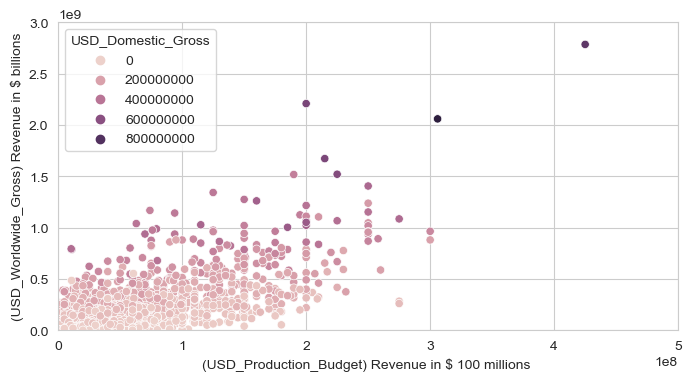

In [60]:
plt.figure(figsize=(8,4))
ax=sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Domestic_Gross')
sns.set_style('whitegrid')
ax.set_xlim(0,500000000)
ax.set_ylim(0,3000000000)
ax.set_xlabel('(USD_Production_Budget) Revenue in $ 100 millions ')
ax.set_ylabel('(USD_Worldwide_Gross) Revenue in $ billions')

In [56]:
data.Release_Date

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

**Year vs Budget**

Text(0, 0.5, 'Budget in $ in 100 millions')

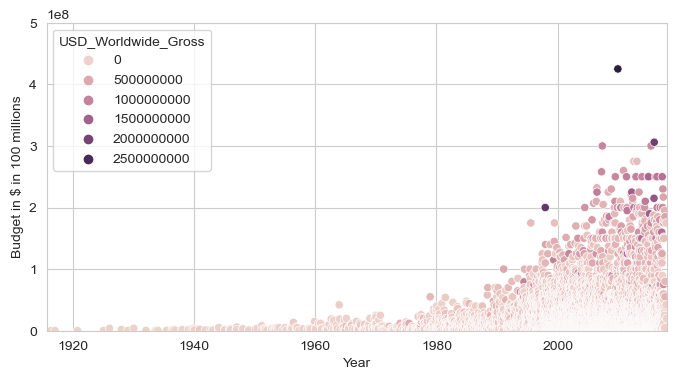

In [61]:
plt.figure(figsize=(8,4))
ax=sns.scatterplot(data=data_clean, x='Release_date', y='USD_Production_Budget', hue='USD_Worldwide_Gross')
sns.set_style('darkgrid')
ax.set_xlim(data_clean.Release_date.min(),data_clean.Release_Date.max())
ax.set_ylim(0,500000000)
ax.set_xlabel('Year')
ax.set_ylabel('Budget in $ in 100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [70]:
pd.to_datetime(data_clean.Release_Date)

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5379   2017-10-02
5380   2017-10-03
5381   2017-12-05
5382   2017-12-05
5383   2017-12-31
Name: Release_Date, Length: 5384, dtype: datetime64[ns]

In [71]:
years=pd.DatetimeIndex(data_clean.Release_Date).year
decades=(years//10)*10

In [73]:
data_clean['Decade'] = decades

In [75]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915-08-02,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1916-05-09,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916-12-24,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920-09-17,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1925-01-01,1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2017-10-02,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2017-10-03,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2017-12-05,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2017-12-05,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [76]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >=1970]

In [77]:
old_films.shape

(153, 8)

In [79]:
old_films.sort_values(by= 'USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Release_date,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1963-12-06,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1969-12-16,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1969-01-01,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1965-02-15,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1969-10-15,1960
...,...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1969-07-25,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1942-11-16,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1968-01-10,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915-08-02,1910


<img src='Cleopatra_poster.jpg'>

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

Text(0, 0.5, 'Revenue in $100 millions')

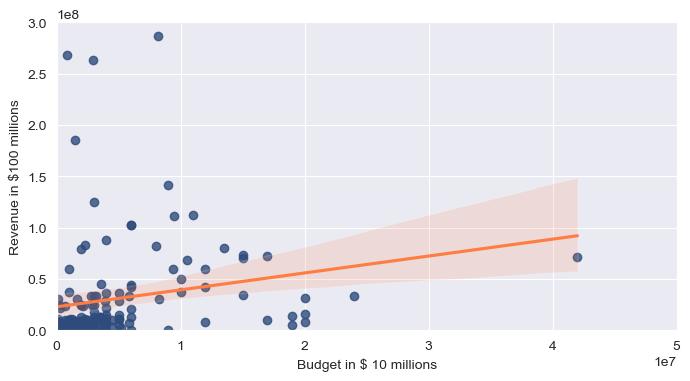

In [172]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws={'color':'#2f4b7c'}, line_kws={'color':'#ff7c43'})
plt.xlim(0, 50000000)
plt.ylim(0,300000000)
plt.xlabel('Budget in $ 10 millions')
plt.ylabel('Revenue in $100 millions')

Text(0, 0.5, 'Revenue in $ billions')

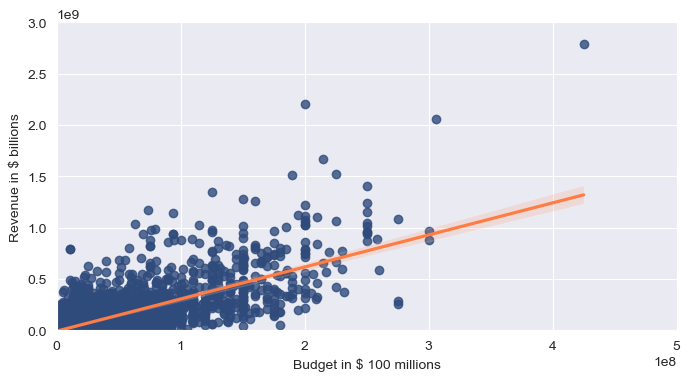

In [173]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.regplot(data=new_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws={'color':'#2f4b7c'}, line_kws={'color':'#ff7c43'})
plt.xlim(0, 500000000)
plt.ylim(0,3000000000)
plt.xlabel('Budget in $ 100 millions')
plt.ylabel('Revenue in $ billions')

In [174]:
## approximately 150 million budget film will make 0.5 billion

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [199]:
import sklearn
from sklearn.linear_model import LinearRegression

In [205]:
regression = LinearRegression()
X=pd.DataFrame(new_films['USD_Production_Budget'])
Y=pd.DataFrame(new_films['USD_Worldwide_Gross'])

regression.fit(X,Y)

LinearRegression()

**y intercept means that when movie budget is 0 the value is:**

In [206]:
theta_0=regression.intercept_
theta_0

array([-8650768.00661024])

In [207]:
theta_1=regression.coef_
theta_1

array([[3.12259592]])

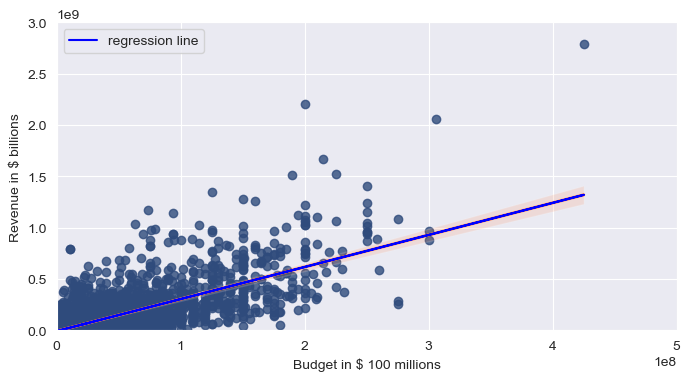

In [203]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.regplot(data=new_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws={'color':'#2f4b7c'}, line_kws={'color':'#ff7c43'})
plt.xlim(0, 500000000)
plt.ylim(0,3000000000)
plt.xlabel('Budget in $ 100 millions')
plt.ylabel('Revenue in $ billions')
y =  theta_0 + theta_1*X
plt.plot(X,y, color='blue', label='regression line')
plt.legend()

**R-squared goodness of fit**

In [208]:
regression.score(X,Y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [209]:
regression = LinearRegression()
X=pd.DataFrame(old_films['USD_Production_Budget'])
Y=pd.DataFrame(old_films['USD_Worldwide_Gross'])

regression.fit(X,Y)

LinearRegression()

In [210]:
theta_0= regression.intercept_
theta_0

array([22821538.63508038])

In [211]:
theta_1=regression.coef_
theta_1

array([[1.64771314]])

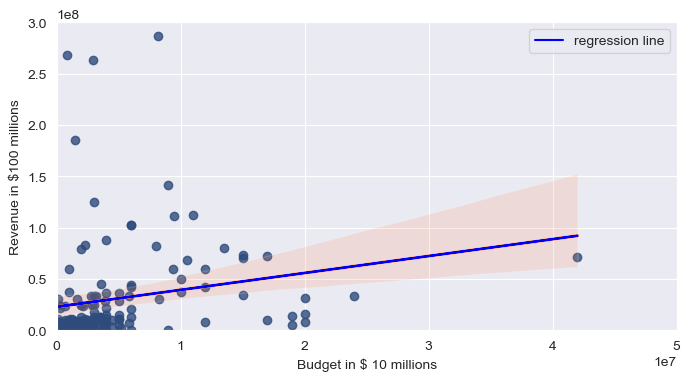

In [212]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws={'color':'#2f4b7c'}, line_kws={'color':'#ff7c43'})
plt.xlim(0, 50000000)
plt.ylim(0,300000000)
plt.xlabel('Budget in $ 10 millions')
plt.ylabel('Revenue in $100 millions')
y =  theta_0 + theta_1*X
plt.plot(X,y, color='blue', label='regression line')
plt.legend()

In [213]:
regression.score(X,Y)

0.02937258620576877

**The above model is a worst fit due to a very low coefficient of determination**

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [224]:
revenue=theta_0[0] + theta_1[0][0]*350000000

In [230]:
f'{revenue:.10}'

'599521139.0'